In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#### movies---> genre
movie_dict = {}
movie_map = {}
with open("/content/movies.dat", "r", encoding="latin1") as file:
    for line in file:
        # Split the line into MovieID, Title, and Genres
        parts = line.strip().split("::")
        movie_id = parts[0]
        title = parts[1]
        genres = parts[2].split("|")  # Split genres by "|"

        # Create a dictionary entry for the movie
        movie_dict[movie_id] = {
            'title': title,
            'genres': genres,
            'avg_rating': 0,
            'count': 0
        }

        # Create a movie dictionary to map movie name with movie id
        movie_map[title] = {
            'id': movie_id
        }

In [5]:
genres = [
    'Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy',
    'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'
]
genres_dict = {genre: index for index, genre in enumerate(genres)}

In [6]:
# # Initialize the matrix with NaNs
ratings_matrix = np.full((6041, 18), np.nan)
freq_matrix = np.zeros((6041,18))
ages = np.zeros(6041)
occupations = np.zeros(6041)

In [8]:
with open("/content/users.dat", "r", encoding="latin1") as file:
    for line in file:
        # Split the line into MovieID, Title, and Genres
        parts = line.strip().split("::")
        user_id = int(parts[0])
        age = int(parts[2])
        occupation = int(parts[3])
        ages[user_id] = age
        occupations[user_id] = occupation

In [10]:
# Assuming you've initialized ratings_matrix and freq_matrix appropriately before the loop

with open("/content/ratings.dat", "r") as file:
    for line in file:
        # Split the line into UserID, MovieID, Rating, and Timestamp
        parts = line.strip().split("::")
        UserID = int(parts[0])
        MovieID = int(parts[1])
        Rating = float(parts[2])

        cur_avg = movie_dict[str(MovieID)]['avg_rating']
        cur_avg *= movie_dict[str(MovieID)]['count']
        cur_avg += Rating
        movie_dict[str(MovieID)]['count'] += 1
        cur_avg /= movie_dict[str(MovieID)]['count']
        movie_dict[str(MovieID)]['avg_rating'] = cur_avg

        # Check if the MovieID exists in the movie_dict
        if str(MovieID) in movie_dict:
            genres = movie_dict[str(MovieID)]['genres']

            # Iterate through genres for the MovieID
            for genre in genres:
                # Get the index of the genre from the genres_dict
                genre_index = genres_dict.get(genre, -1)

                # If the genre exists in the genres_dict, update the ratings_matrix
                if genre_index != -1:
                    cur_rating = 0
                    if not np.isnan(ratings_matrix[UserID, genre_index]):
                        cur_rating = ratings_matrix[UserID, genre_index] * freq_matrix[UserID, genre_index]
                    cur_rating += Rating
                    freq_matrix[UserID, genre_index] += 1
                    cur_rating /= freq_matrix[UserID, genre_index]
                    ratings_matrix[UserID, genre_index] = cur_rating

In [11]:
df = pd.DataFrame(ratings_matrix)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.200000,4.000000,4.111111,4.25,4.142857,4.000000,NaN,4.428571,4.0,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.0,4.0,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.00,3.766667,NaN,NaN,4.000000,4.5,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,NaN,4.00,NaN,5.000000,NaN,4.166667,4.5,NaN,4.333333,NaN,NaN,4.000000,3.555556,3.500000,3.333333,4.500000


In [13]:
# total_sum = np.sum(freq_matrix)
# print("Sum of all the values in the freq_matrix:", total_sum)

In [14]:
# sum_without_nan = df.sum(skipna=True)
# print(sum_without_nan)

In [15]:
non_nan_counts = df.count()
print(non_nan_counts)

0     6012
1     5894
2     4808
3     5283
4     6031
5     5662
6     2243
7     6037
8     4850
9     4150
10    5300
11    4754
12    5133
13    5961
14    5911
15    5989
16    5769
17    4100
dtype: int64


In [16]:
def replace_nan_with_avg(row):
    avg = row.mean()
    return row.fillna(avg)

def replace_nan_with_mid(row):
    avg = 2.5
    return row.fillna(avg)

df = df.apply(replace_nan_with_mid, axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.500000,2.500000,2.500000,2.50,2.500000,2.500000,2.5,2.500000,2.5,2.5,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
1,4.200000,4.000000,4.111111,4.25,4.142857,4.000000,2.5,4.428571,4.0,2.5,2.500000,4.285714,2.500000,3.666667,4.333333,3.666667,5.000000,2.500000
2,3.500000,3.736842,2.500000,2.50,3.560000,3.583333,2.5,3.898734,3.0,4.0,3.000000,2.500000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.00,3.766667,2.500000,2.5,4.000000,4.5,2.5,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,2.500000,4.00,2.500000,5.000000,2.5,4.166667,4.5,2.5,4.333333,2.500000,2.500000,4.000000,3.555556,3.500000,3.333333,4.500000


In [17]:
df = df.drop(df.index[0])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,2.500000,4.428571,4.0,2.5,2.500000,4.285714,2.500000,3.666667,4.333333,3.666667,5.000000,2.500000
2,3.500000,3.736842,2.500000,2.500000,3.560000,3.583333,2.500000,3.898734,3.0,4.0,3.000000,2.500000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,2.500000,2.500000,4.000000,4.5,2.5,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,2.500000,4.000000,2.500000,5.000000,2.500000,4.166667,4.5,2.5,4.333333,2.500000,2.500000,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,2.5,4.0,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000


## SVD

In [18]:
import math

def dot_product(v1, v2):
    """Compute dot product of two vectors."""
    return sum((v1[i] * v2[i]) for i in range(len(v1)))

def norm(v):
    """Compute the Euclidean norm of a vector."""
    return math.sqrt(sum(x ** 2 for x in v))

def triu(A):
    """
    Extract the upper triangular part of a matrix.

    Parameters:
        A (numpy.ndarray): Input matrix.

    Returns:
        numpy.ndarray: Upper triangular part of the input matrix.
    """
    m, n = A.shape
    result = np.zeros_like(A)
    for i in range(m):
        for j in range(i, n):
            result[i, j] = A[i, j]
    return result

def qr_decomposition(A):
    """
    Compute the QR decomposition of matrix A.

    Parameters:
        A (numpy.ndarray): Input matrix.

    Returns:
        Q (numpy.ndarray): Orthogonal matrix.
        R (numpy.ndarray): Upper triangular matrix.
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = np.copy(A[:, j])
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

def eigen_from_qr(A, tol=1e-10, max_iter=1000):
    """
    Compute eigenvalues and eigenvectors from the QR decomposition algorithm.

    Parameters:
        A (numpy.ndarray): Input matrix.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        eigenvalues (numpy.ndarray): Eigenvalues.
        eigenvectors (numpy.ndarray): Eigenvectors.
    """
    n = A.shape[0]
    eigenvectors = np.identity(n)

    for _ in range(max_iter):
        Q, R = qr_decomposition(A)
        A_next = np.dot(R, Q)

        # Check convergence
        off_diag = np.sum(np.abs(A_next - triu(A_next)))  # Off-diagonal elements
        if off_diag < tol:
            break

        # Update eigenvectors
        eigenvectors = np.dot(eigenvectors, Q)

        A = A_next

    eigenvalues = np.diag(A)
    return eigenvalues, eigenvectors

def svd(A, tol=1e-10):
    """
    Compute the Singular Value Decomposition of matrix A.

    Parameters:
        A (numpy.ndarray): Input matrix of shape (m, n).
        tol (float): Tolerance threshold for singular values. Values smaller than tol are considered zero.

    Returns:
        U (numpy.ndarray): Left singular vectors of A, shape (m, m).
        Sigma (numpy.ndarray): Singular values of A, shape (m, n).
        Vt (numpy.ndarray): Right singular vectors of A, shape (n, n).
    """
    # Compute covariance matrix
    C = np.dot(A.T, A)

    # Compute eigenvalues and eigenvectors of the covariance matrix using QR algorithm
    eigenvalues, V = eigen_from_qr(C)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]

    # Compute singular values and right singular vectors
    Sigma = np.sqrt(np.abs(eigenvalues))

    # Compute left singular vectors
    U = np.dot(A, V) / Sigma

    # Apply tolerance threshold
    Sigma[Sigma < tol] = 0

    # Calculate Vt (transpose of V)
    Vt = V.T

    return U, Sigma, Vt

def reduced_svd(A, k=5, tol=1e-10):
    """
    Compute the Reduced Singular Value Decomposition of matrix A.

    Parameters:
        A (numpy.ndarray): Input matrix of shape (m, n).
        k (int): Number of singular values and vectors to compute.
        tol (float): Tolerance threshold for singular values. Values smaller than tol are considered zero.

    Returns:
        U (numpy.ndarray): Left singular vectors of A, shape (m, k).
        Sigma (numpy.ndarray): Singular values of A, shape (k,).
        Vt (numpy.ndarray): Right singular vectors of A, shape (k, n).
    """
    # Compute covariance matrix
    C = np.dot(A.T, A)

    # Compute eigenvalues and eigenvectors of the covariance matrix using QR algorithm
    eigenvalues, V = eigen_from_qr(C)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]

    # Compute singular values and right singular vectors
    Sigma = np.sqrt(np.abs(eigenvalues))

    # Compute left singular vectors
    U = np.dot(A, V[:, :k]) / Sigma[:k]

    # Apply tolerance threshold
    Sigma[Sigma < tol] = 0

    # Calculate Vt (transpose of V)
    Vt = V[:, :k].T

    return U, Sigma[:k], Vt

In [19]:
mat = df.values
print(mat)

[[4.2        4.         4.11111111 ... 3.66666667 5.         2.5       ]
 [3.5        3.73684211 2.5        ... 3.48387097 3.73333333 4.33333333]
 [3.95652174 4.         4.         ... 3.8        4.         4.66666667]
 ...
 [3.         4.         3.66666667 ... 2.5        4.         2.5       ]
 [4.         4.1        3.61538462 ... 4.14285714 4.11111111 4.5       ]
 [2.97619048 2.81818182 3.         ... 3.92682927 3.69565217 4.        ]]


In [20]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_indices, test_indices = train_test_split(mat, np.arange(mat.shape[0]), test_size=0.2, shuffle=True, random_state=42)

In [21]:
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import TruncatedSVD
# U, Sigma, VT = np.linalg.svd(train_data, full_matrices=False)
U, Sigma, VT = svd(train_data)
print(U)

[[ 1.21437840e-02  1.38176157e-03 -8.24721188e-03 ...  1.60579784e-02
   4.96407760e-05  1.84791777e-02]
 [ 1.49450303e-02  3.09915893e-04  2.33491496e-02 ...  1.12760065e-02
   6.60701853e-04 -1.21848350e-02]
 [ 1.35111683e-02  9.57041132e-03  2.95458023e-03 ...  1.41177538e-02
   1.72617672e-02 -3.39858190e-02]
 ...
 [ 1.19901796e-02  7.20794572e-03 -5.98601218e-03 ... -5.35505516e-03
  -1.41799193e-03 -2.86389152e-03]
 [ 1.23236819e-02 -1.70786178e-02 -1.95731080e-02 ...  3.84589739e-02
  -2.20661732e-02  6.06380014e-02]
 [ 1.52864729e-02  1.95172440e-03  1.20886028e-02 ...  4.05673849e-03
  -1.82468852e-02  8.44399114e-03]]


In [22]:
print(Sigma)

[1047.55870585   71.4354211    67.83263793   58.16185586   54.91772003
   51.48741855   49.42334618   47.60492198   44.02401284   41.6942026
   36.11114211   35.29542551   33.45464368   28.54998591   25.77354818
   23.26949942   19.89062655   18.5972883 ]


In [23]:
newmat = U @ np.diag(Sigma) @ VT
print(newmat)

[[3.1875     3.02857143 3.         ... 3.43333333 4.         1.5       ]
 [3.6        3.5        4.66666667 ... 4.16666667 4.25       2.5       ]
 [3.38461538 4.33333333 4.         ... 3.5        3.71428571 3.        ]
 ...
 [3.20155039 3.31578947 2.5        ... 3.1369863  2.9        3.        ]
 [3.625      3.         2.5        ... 3.5        2.5        4.        ]
 [4.         3.28571429 4.         ... 3.66666667 3.5        4.        ]]


In [24]:
def user_representation(i):
    row = mat[i]
    v = np.transpose(VT)
    res = np.dot(row, v)
    res = res /Sigma
    res = np.array(res)
    res = np.transpose(res)
    res = res.reshape(1,-1)
    return res

# print(user_representation(0))

## KMeans

In [25]:
class myKMeans:
    def __init__(self, n_clusters, max_iter = 150, random_state=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.inertia_ = 0.00

    def mydistance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def plus_plus(self, data: np.array):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        self.n_samples = data.shape[0]
        centroids = [data[0]]

        for _ in range(1, self.n_clusters):
            distances = np.array([min([((self.mydistance(x, c))**2) for c in centroids]) for x in data])
            prob = distances / distances.sum()
            cumulative_prob = prob.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_prob):
                if r < p:
                    i = j
                    break
            centroids.append(data[i])

        return np.array(centroids)

    def _closest_centroid(self, sample, centroids):
        min_dist = float('inf')
        closest_centroid_idx = None
        for i, centroid in enumerate(centroids):
            dist = self.mydistance(sample, centroid)
            if dist < min_dist:
                min_dist = dist
                closest_centroid_idx = i
        return closest_centroid_idx

    def _centroids_by_distance(self, sample, centroids):
        """
        Return centroids sorted in ascending order of their distances from the given data point.

        Parameters:
            sample: The data point for which distances to centroids are calculated.
            centroids: List of centroids.

        Returns:
            List of centroids sorted by their distances from the sample.
        """
        distances = []
        for i, centroid in enumerate(centroids):
            distances.append((i, self.mydistance(sample, centroid)))
        sorted_distances = sorted(distances, key=lambda x: x[1])  # Sort distances by the second element (distance)
        sorted_centroids = [idx for idx, _ in sorted_distances]
        return sorted_centroids

    def _create_clusters(self, centroids, X):
        clusters = [[] for _ in range(self.n_clusters)]
        for i, sample in enumerate(X):
            cluster_index = self._closest_centroid(sample, centroids)
            clusters[cluster_index].append(i)
        return clusters

    def _get_centroids(self, clusters, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i, cluster in enumerate(clusters):
            cluster_mean = np.mean(X[cluster], axis=0)
            centroids[i] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        return np.array_equal(centroids_old, centroids)

    def fit(self, X):
        self.centroids = self.plus_plus(X)
        for _ in range(self.max_iter):
            old_centroids = np.copy(self.centroids)
            clusters = self._create_clusters(self.centroids, X)
            self.centroids = self._get_centroids(clusters, X)
            if self._is_converged(old_centroids, self.centroids):
                break
        self.labels_ = self.get_cluster_labels(clusters)
        self.calculate_inertia(X, self.labels_)

    def predict(self, X):
        return np.array([self.predict_point(sample) for sample in X])

    def predict2(self, X):
        return np.array([self.predict_point2(sample) for sample in X])

    def get_cluster_labels(self, clusters):
        labels_ = np.empty(self.n_samples)
        for i, cluster in enumerate(clusters):
            for pti in cluster:
                labels_[pti] = i
        return labels_

    def calculate_inertia(self, datapoints, labels_):
        labels_ = labels_.astype(int)
        for i, pt in enumerate(datapoints):
            self.inertia_ += (self.mydistance(pt, self.centroids[int(labels_[i])]))**2

    def predict_point(self, datapoint):
        return self._closest_centroid(datapoint, self.centroids)

    def predict_point2(self, datapoint):
        return self._centroids_by_distance(datapoint, self.centroids)

In [26]:
# from sklearn.cluster import KMeans

# def kmeans_cluster_labels(k):
#     kmeans = KMeans(n_clusters=k, n_init=10)
#     kmeans.fit(U)
#     cluster_labels = kmeans.labels_
#     return cluster_labels,kmeans


In [27]:
def kmeans_cluster_labels(k):
    kmeans = myKMeans(n_clusters=k)
    kmeans.fit(U)
    cluster_labels = kmeans.labels_
    return cluster_labels,kmeans


In [28]:
def calculate_age_weight(age1, age2):
    return 1 - ((abs(((age1 + 9)//10) - ((age2 + 9)//10))) + 0.0)/10

def calculate_occupation_weight(occupation1, occupation2):
    if (occupation1-occupation2 == 0):
        return 1
    else:
        return 0.9          # If different occupation then reduce the similarity by 10%

def pearson_correlation(X, Y, choice, age1, age2, occupation1, occupation2):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    numerator = np.sum((X - mean_X) * (Y - mean_Y))
    denominator = np.sqrt(np.sum((X - mean_X) ** 2) * np.sum((Y - mean_Y) ** 2))
    pearson_corr = numerator / denominator
    if choice == 0:
        return pearson_corr
    elif choice == 1:
        weight = calculate_age_weight(age1, age2)
        return weight*pearson_corr
    elif choice == 2:
        weight = calculate_occupation_weight(occupation1, occupation2)
        return weight*pearson_corr

In [47]:
def mean_squared_error(row1, row2, choice='mse'):
    if choice == 'mse':
        mse = np.mean((row1 - row2) ** 2)
        return mse
    elif choice == 'mae':
        mae = np.mean(np.abs(row1 - row2))
        return mae
    elif choice == 'rmse':
        rmse = np.sqrt(np.mean((row1 - row2) ** 2))
        return rmse

In [30]:
def check(num_clust):
    tot_error = 0
    cluster_labels,kmeans = kmeans_cluster_labels(num_clust)
    for index1, row1 in enumerate(test_data):
        ur = user_representation(index1)
        cn = kmeans.predict(ur)
        abssim = 0
        pred_rating = np.zeros((1, 18))
        for index2, row2 in enumerate(train_data):
            if(cluster_labels[index2]==cn):
                sim = pearson_correlation(row1, row2, 0, ages[test_indices[index1]], ages[train_indices[index2]], occupations[test_indices[index1]], occupations[train_indices[index2]])
                abssim += abs(sim)
                pred_rating += sim*(mat[train_indices[index2]])
        pred_rating /= abssim
        tot_error += mean_squared_error(pred_rating,mat[test_indices[index1]])
    return tot_error

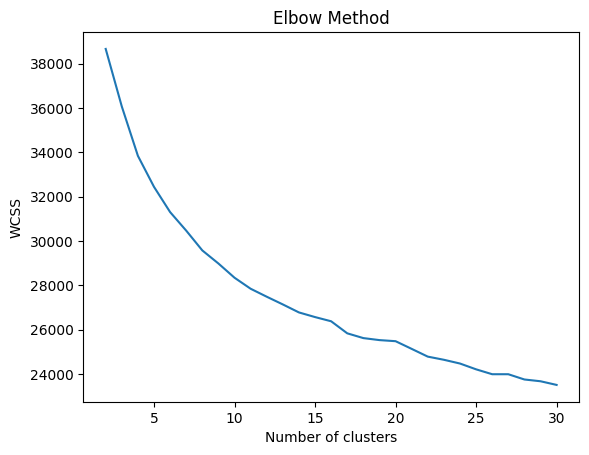

In [ ]:
# # Takes about 15 mins to run
# wcss = []
# def optimal_clusters(max_k):
#     for k in range(2, max_k + 1):
#         kmeans = myKMeans(n_clusters=k, random_state=42)
#         kmeans.fit(train_data)
#         wcss.append(kmeans.inertia_)
#     plt.plot(range(2, max_k + 1), wcss)
#     plt.title('Elbow Method')
#     plt.xlabel('Number of clusters')
#     plt.ylabel('WCSS')
#     plt.show()

# optimal_clusters(30)

In [ ]:
# err = []
# def test_error(max_k):
#       for k in range(2,max_k+1):
#           err.append(check(k))
#       plt.plot(range(2, max_k + 1),err)
#       plt.title('Error Method')
#       plt.xlabel('Number of clusters')
#       plt.ylabel('Test Error')
#       plt.show()


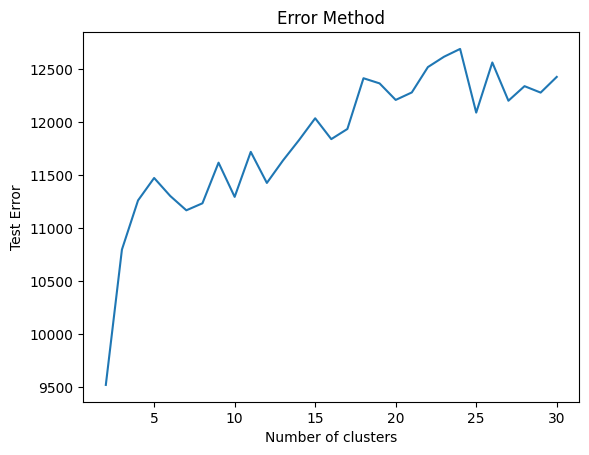

In [ ]:
# test_error(30)

In [31]:
movies_avg_rating = np.zeros(4000)
freq_of_movies = np.zeros(4000)
watched = {}

with open("/content/ratings.dat", "r") as file:
    for line in file:
        # Split the line into UserID, MovieID, Rating, and Timestamp
        parts = line.strip().split("::")
        UserID = int(parts[0])
        MovieID = int(parts[1])
        Rating = float(parts[2])
        if UserID not in watched:
            watched[UserID] = []
        watched[UserID].append(MovieID)
        new_rating = movies_avg_rating[MovieID] * freq_of_movies[MovieID]
        new_rating += Rating
        freq_of_movies[MovieID] += 1
        new_rating /= freq_of_movies[MovieID]

        movies_avg_rating[MovieID] = new_rating

In [ ]:
# print(watched[155])

[2124, 2054, 3868, 586, 587, 4, 5, 2134, 1405, 2136, 2067, 1265, 1193, 1196, 593, 3884, 2301, 1294, 2245, 2324, 2252, 1380, 1457, 924, 784, 858, 2407, 934, 1474, 2424, 3157, 1485, 3307, 1704, 2291, 3248, 3175, 2379, 3253, 2380, 2381, 1580, 110, 2383, 1581, 2605, 3263, 2539, 2396, 3415, 2470, 2471, 2622, 141, 3500, 2496, 2717, 2574, 231, 236, 3450, 3525, 2728, 1784, 2735, 256, 3470, 3471, 3618, 19, 199, 3629, 410, 2829, 2683, 1883, 21, 420, 355, 357, 432, 367, 296, 370, 520, 3742, 1208, 3821, 2953, 1221, 2028, 1227, 1081, 552, 637, 1247]


In [32]:
top_genre_movies = {}
for i in range(1, 4000):
    if str(i) in movie_dict.keys():
        genres = movie_dict[str(i)]['genres']
        for genre in genres:
            genre_index = genres_dict.get(genre, -1)
            if genre_index not in top_genre_movies:
                top_genre_movies[genre_index] = []
            top_genre_movies[genre_index].append((movies_avg_rating[i], i))

In [ ]:
# print(top_genre_movies)

{2: [(4.146846413095821, 1), (3.2626262626262625, 13), (2.9764397905759163, 48), (2.874999999999999, 239), (1.9, 244), (2.8888888888888893, 313), (3.8608385370205176, 364), (2.703703703703704, 558), (3.788304959289415, 588), (3.8453473132372213, 594), (3.8858490566037736, 595), (3.751004016064257, 596), (3.546925566343042, 610), (3.3525179856115104, 616), (2.0799999999999996, 631), (3.4647619047619043, 661), (2.6198934280639414, 673), (3.0416666666666656, 709), (4.426940639269405, 720), (4.089171974522293, 741), (4.520547945205475, 745), (3.223076923076924, 783), (2.208333333333333, 888), (3.755632582322357, 1022), (3.986425339366516, 1023), (3.246031746031746, 1024), (3.6109215017064846, 1025), (3.688380281690141, 1029), (3.0773993808049562, 1030), (3.697142857142857, 1032), (3.449477351916377, 1033), (2.8947368421052655, 1064), (4.507936507936515, 1148), (3.4838709677419355, 1151), (3.380952380952381, 1205), (4.361522198731503, 1223), (3.93362831858407, 1274), (3.904559915164369, 128

In [33]:
for genre_index, movies_list in top_genre_movies.items():
    # Sort the movies_list based on the first value of each pair (movie ID)
    sorted_movies_list = sorted(movies_list, key=lambda x: -x[0])
    top_genre_movies[genre_index] = sorted_movies_list

In [34]:
def recommended_movie(userid, genre,num,top_rec_movies):
    top_movies = []
    watched_movies = set(watched.get(userid, []))

    for rating, movie_id in top_genre_movies[genre]:
        if movie_id not in watched_movies and movie_id not in top_rec_movies:
            top_movies.append(movie_id)
            if len(top_movies) == num:
                break
    return top_movies

In [35]:
def final_cluster(knum,userid):
    cluster_labels, kmeans = kmeans_cluster_labels(knum)
    userid-=1
    ur = user_representation(userid)
    cn = kmeans.predict(ur)
    abssim = 0
    pred_rating = np.zeros((1, 18))
    for index2, row2 in enumerate(train_data):
        if(cluster_labels[index2]==cn):
            sim = pearson_correlation(mat[userid], row2, 0, ages[userid], ages[train_indices[index2]], occupations[userid], occupations[train_indices[index2]])
            abssim += abs(sim)
            pred_rating += sim*(mat[train_indices[index2]])
    pred_rating /= abssim
    # print(pred_rating)
    top_genre = np.argsort(-pred_rating)
    # print(top_genre[0][0])
    top_rec_movies = []
    top_rec_movies += recommended_movie(userid,top_genre[0][0],3,top_rec_movies)
    top_rec_movies += recommended_movie(userid,top_genre[0][1],2,top_rec_movies)
    top_rec_movies += recommended_movie(userid,top_genre[0][2],1,top_rec_movies)
    for item in top_rec_movies:
        if str(item) in movie_dict:
            print(movie_dict[str(item)]['title'], end ='\n')


In [36]:
userID = 10
final_cluster(6,userID)
# print(recommended_movie(6030,0,1))

Wizard of Oz, The (1939)
Iron Giant, The (1999)
Winnie the Pooh and the Blustery Day (1968)
Star Wars: Episode IV - A New Hope (1977)
Hungarian Fairy Tale, A (1987)
Singin' in the Rain (1952)


In [37]:
def recommended_movie2(genre, num, moviess):
    top_movies = []
    for rating, movie_id in top_genre_movies[genre]:
        if movie_id not in moviess and movie_dict[str(movie_id)]['count'] >= 1000:
            top_movies.append(movie_id)
            if len(top_movies) == num:
                break
    return top_movies

In [38]:
def map_age(age):
    if age < 18:
        return 1
    elif age >= 18 and age < 25:
        return 18
    elif age >= 25 and age < 35:
        return 25
    elif age >= 35 and age < 45:
        return 35
    elif age >= 45 and age < 50:
        return 45
    elif age >= 50 and age < 56:
        return 50
    elif age >= 56:
        return 56

In [48]:
moviess = []
rat = []
def best_recommandations(moviess, rat, type1=False,type2=False):


        user_age = int(input("Please enter the age of the user: "))
        user_occupation = int(input("Enter the occupation number: "))

        user_age = map_age(user_age)

        num_inputs = int(input("Enter the number of movies watched: "))
        for i in range(num_inputs):
            line = input("Enter the movie: ")
            # Split the line into MovieID, Title, and Genres
            parts = line.strip().split("::")
            title = parts[0]
            genres = parts[1].split("|")  # Split genres by "|"
            movie_id = movie_map[title]['id']
            moviess.append(movie_id)

            user_input = float(input("Enter the movie rating: "))
            rat.append(user_input)


        # print(moviess)
        # print(rat)

        newuser_genre = np.full(18,np.nan)
        newuser_freq = np.zeros(18)

        for index,mID in enumerate(moviess):
            if str(mID) in movie_dict:
                genres = movie_dict[str(mID)]['genres']
                for genre in genres:
                    genre_index = genres_dict.get(genre, -1)
                    # print(genre_index)
                    if np.isnan(newuser_genre[genre_index]):
                        newuser_genre[genre_index] = 0
                    new_rating = newuser_genre[genre_index] * newuser_freq[genre_index] + rat[index]
                    newuser_freq[genre_index] +=1
                    new_rating /= newuser_freq[genre_index]
                    # print(new_rating)
                    newuser_genre[genre_index] = new_rating
        # print(newuser_genre)
        newuser_genre[np.isnan(newuser_genre)] = 2.5
        v = np.transpose(VT)
        res = np.dot(newuser_genre, v)
        res = res /Sigma
        res = np.array(res)
        res = np.transpose(res)
        res = res.reshape(1,-1)
        cluster_labels,kmeans = kmeans_cluster_labels(20)

        my_labels =[]
        if type1:
                sorted_labels = kmeans.predict_point2(res)
                my_labels.append(sorted_labels[0])
                my_labels.append(sorted_labels[1])
                my_labels.append(sorted_labels[2])
        elif type2:
                sorted_labels = kmeans.predict_point2(res)
                my_labels.append(sorted_labels[len(sorted_labels) - 1])
        else :
                cn = kmeans.predict(res)
                my_labels.append(cn)
        # print(res)
        abssim = 0
        pred_rating = np.zeros((1, 18))
        for index2, row2 in enumerate(train_data):
            if(cluster_labels[index2] in my_labels):
                sim = pearson_correlation(res, row2, 0, user_age, ages[train_indices[index2]], user_occupation, occupations[train_indices[index2]])
                abssim += abs(sim)
                pred_rating += sim*(mat[train_indices[index2]])
        pred_rating /= abssim
        top_genre = np.argsort(-pred_rating)
        moviess += recommended_movie2(top_genre[0][0], 3, moviess)
        moviess += recommended_movie2(top_genre[0][1], 2, moviess)
        moviess += recommended_movie2(top_genre[0][2], 1, moviess)

        print("\nRecommended For You:\n")
        for i in range(num_inputs, min(num_inputs+6, len(moviess))):
            item = moviess[i]
            if str(item) in movie_dict:
                print(movie_dict[str(item)]['title'], end = '::')
                genres = movie_dict[str(item)]['genres']
                for genre in genres:
                    print(genre, end = '|')
                print("Rating: ", end = '')
                print("{:.2f}".format(movie_dict[str(item)]['avg_rating']), end = '\t')
                print("Rated by: ", end = '')
                print(movie_dict[str(item)]['count'], end = ' ')
                print("Users", end = '\n')


        # print(pred_rating)


In [49]:
best_recommandations(moviess = moviess, rat = rat, type2 = False)

Please enter the age of the user: 24
Enter the occupation number: 1
Enter the number of movies watched: 2
Enter the movie: Heat (1995)::Action|Crime|Thriller
Enter the movie rating: 4
Enter the movie: Terminator 2: Judgment Day (1991)::Action|Sci-Fi|Thriller
Enter the movie rating: 4

Recommended For You:

Maltese Falcon, The (1941)::Film-Noir|Mystery|Rating: 4.40	Rated by: 1043 Users
Chinatown (1974)::Film-Noir|Mystery|Thriller|Rating: 4.34	Rated by: 1185 Users
Blade Runner (1982)::Film-Noir|Sci-Fi|Rating: 4.27	Rated by: 1800 Users
Rear Window (1954)::Mystery|Thriller|Rating: 4.48	Rated by: 1050 Users
L.A. Confidential (1997)::Crime|Film-Noir|Mystery|Thriller|Rating: 4.22	Rated by: 2288 Users
Godfather, The (1972)::Action|Crime|Drama|Rating: 4.52	Rated by: 2223 Users


In [ ]:
# Wizard of Oz, The (1939)::Adventure|Children's|Drama|Musical|Rating: 4.25	Rated by: 1718 Users
# This Is Spinal Tap (1984)::Comedy|Drama|Musical|Rating: 4.18	Rated by: 1118 Users
# Blues Brothers, The (1980)::Action|Comedy|Musical|Rating: 3.94	Rated by: 1341 Users
# Raiders of the Lost Ark (1981)::Action|Adventure|Rating: 4.48	Rated by: 2514 Users
# Star Wars: Episode IV - A New Hope (1977)::Action|Adventure|Fantasy|Sci-Fi|Rating: 4.45	Rated by: 2991 Users
# E.T. the Extra-Terrestrial (1982)::Children's|Drama|Fantasy|Sci-Fi|Rating: 3.97	Rated by: 2269 Users
# - Occupation is chosen from the following choices:

# 	*  0:  "other" or not specified
# 	*  1:  "academic/educator"
# 	*  2:  "artist"
# 	*  3:  "clerical/admin"
# 	*  4:  "college/grad student"
# 	*  5:  "customer service"
# 	*  6:  "doctor/health care"
# 	*  7:  "executive/managerial"
# 	*  8:  "farmer"
# 	*  9:  "homemaker"
# 	* 10:  "K-12 student"
# 	* 11:  "lawyer"
# 	* 12:  "programmer"
# 	* 13:  "retired"
# 	* 14:  "sales/marketing"
# 	* 15:  "scientist"
# 	* 16:  "self-employed"
# 	* 17:  "technician/engineer"
# 	* 18:  "tradesman/craftsman"
# 	* 19:  "unemployed"
# 	* 20:  "writer"

### Collaborative Filtering

In [41]:
rm = np.full((6041, 4000), np.nan)

In [42]:
with open("/content/ratings.dat", "r") as file:
    for line in file:
        # Split the line into UserID, MovieID, Rating, and Timestamp
        parts = line.strip().split("::")
        UserID = int(parts[0])
        MovieID = int(parts[1])
        Rating = float(parts[2])
        rm[UserID, MovieID] = Rating

In [43]:
rm = pd.DataFrame(rm)

In [44]:
non_nan_counts = rm.count(axis=1)

In [45]:
sorted_counts = non_nan_counts.sort_values(ascending=True)
print(sorted_counts.head(2000))

0        0
250     20
2381    20
3530    20
2673    20
        ..
1136    56
3382    56
4157    56
4173    56
288     56
Length: 2000, dtype: int64


<Axes: >

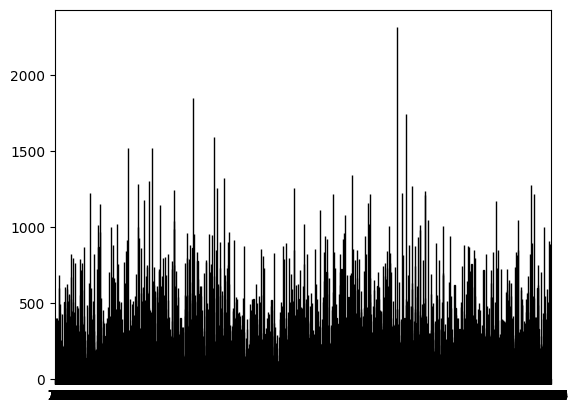

In [46]:
non_nan_counts.plot(kind='bar', rot=0, color='red', edgecolor='black')